In [40]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
health_reviews = pd.read_json('reviews_Health_and_Personal_Care_5.json', lines=True)

In [42]:
reviews = health_reviews.copy()

In [43]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,159985130X,"[1, 1]",5,This is a great little gadget to have around. ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600
1,159985130X,"[1, 1]",4,I would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200
2,159985130X,"[75, 77]",4,What I liked was the quality of the lens and t...,"06 8, 2010",A38RMU1Y5TDP9,"Bob Tobias ""Robert Tobias""",Very good but not great,1275955200
3,159985130X,"[56, 60]",4,Love the Great point light pocket magnifier! ...,"02 8, 2008",A1XZUG7DFXXOS4,Cat lover,great addition to your purse,1202428800
4,159985130X,"[1, 1]",5,This is very nice. You pull out on the magnifi...,"08 16, 2011",A1MS3M7M7AM13X,Cricketoes,Very nice and convenient.,1313452800


In [44]:
reviews.shape

(346355, 9)

I'm going to first lowercase the text for reviewText and summary...

In [45]:
reviews.reviewText = reviews.reviewText.str.lower()

In [46]:
reviews.reviewText.head()

0    this is a great little gadget to have around. ...
1    i would recommend this for a travel magnifier ...
2    what i liked was the quality of the lens and t...
3    love the great point light pocket magnifier!  ...
4    this is very nice. you pull out on the magnifi...
Name: reviewText, dtype: object

In [47]:
reviews.reviewText = reviews['reviewText'].str.replace('[^\w\s]',' ')

In [48]:
reviews.reviewText.head()

0    this is a great little gadget to have around  ...
1    i would recommend this for a travel magnifier ...
2    what i liked was the quality of the lens and t...
3    love the great point light pocket magnifier   ...
4    this is very nice  you pull out on the magnifi...
Name: reviewText, dtype: object

In [49]:
keywords = ['great', 'good', 'fantastic', 'useful', 'love', 'nice', 'recommend']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    reviews[str(key)] = reviews.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [50]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,great,good,fantastic,useful,love,nice,recommend
0,159985130X,"[1, 1]",5,this is a great little gadget to have around ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,True,False,False,False,False,False,False
1,159985130X,"[1, 1]",4,i would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,True,False,False,False,False,False,True
2,159985130X,"[75, 77]",4,what i liked was the quality of the lens and t...,"06 8, 2010",A38RMU1Y5TDP9,"Bob Tobias ""Robert Tobias""",Very good but not great,1275955200,True,True,False,False,False,True,False
3,159985130X,"[56, 60]",4,love the great point light pocket magnifier ...,"02 8, 2008",A1XZUG7DFXXOS4,Cat lover,great addition to your purse,1202428800,True,False,False,False,False,True,False
4,159985130X,"[1, 1]",5,this is very nice you pull out on the magnifi...,"08 16, 2011",A1MS3M7M7AM13X,Cricketoes,Very nice and convenient.,1313452800,False,False,False,False,False,True,True


In [51]:
reviews.loc[reviews.overall < 4, 'overall'] = False
reviews.loc[reviews.overall >= 4, 'overall'] = True

In [52]:
reviews.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,great,good,fantastic,useful,love,nice,recommend
0,159985130X,"[1, 1]",True,this is a great little gadget to have around ...,"01 5, 2011",ALC5GH8CAMAI7,AnnN,Handy little gadget,1294185600,True,False,False,False,False,False,False
1,159985130X,"[1, 1]",True,i would recommend this for a travel magnifier ...,"02 18, 2012",AHKSURW85PJUE,"AZ buyer ""AZ buyer""",Small & may need to encourage battery,1329523200,True,False,False,False,False,False,True
2,159985130X,"[75, 77]",True,what i liked was the quality of the lens and t...,"06 8, 2010",A38RMU1Y5TDP9,"Bob Tobias ""Robert Tobias""",Very good but not great,1275955200,True,True,False,False,False,True,False
3,159985130X,"[56, 60]",True,love the great point light pocket magnifier ...,"02 8, 2008",A1XZUG7DFXXOS4,Cat lover,great addition to your purse,1202428800,True,False,False,False,False,True,False
4,159985130X,"[1, 1]",True,this is very nice you pull out on the magnifi...,"08 16, 2011",A1MS3M7M7AM13X,Cricketoes,Very nice and convenient.,1313452800,False,False,False,False,False,True,True


In [53]:
reviews_subset = reviews[['overall','great','good','fantastic','useful','love','recommend','nice']]

In [54]:
reviews_subset.head()

,overall,great,good,fantastic,useful,love,recommend,nice
0,True,True,False,False,False,False,False,False
1,True,True,False,False,False,False,True,False
2,True,True,True,False,False,False,False,True
3,True,True,False,False,False,False,False,True
4,True,False,False,False,False,False,True,True


In [55]:
reviews_subset.overall = reviews_subset.overall.astype('bool')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


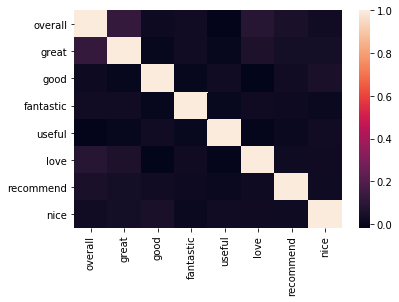

In [56]:
sns.heatmap(reviews_subset.corr())

In [57]:
data = reviews_subset[keywords]
target = reviews_subset['overall']

In [58]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 346355 points : 66554


So as of now, I'm at 80.8% correct...

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[     0,  66554],
       [     0, 279801]])

Wait a second!!!!! It kept choosing True!!!! I need to undersample like with the credit card fraud case!!!

In [60]:
positive_reviews = reviews_subset[reviews_subset.overall == True]

In [61]:
negative_reviews = reviews_subset[reviews_subset.overall == False]

In [62]:
negative_reviews.shape

(66554, 8)

In [63]:
positive_reviews.shape

(279801, 8)

In [64]:
positive_reviews_undersample = positive_reviews[:negative_reviews.shape[0]]

In [65]:
positive_reviews_undersample.shape

(66554, 8)

In [66]:
reviews_undersample = pd.concat([negative_reviews, positive_reviews_undersample])

In [67]:
reviews_undersample.shape

(133108, 8)

In [68]:
data = reviews_undersample[keywords]
target = reviews_undersample['overall']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 133108 points : 55997


42% mislabled! So, 58% correct. It's even worse this time! :-/

In [69]:
confusion_matrix(target, y_pred, labels=[False,True])

array([[53044, 13510],
       [42487, 24067]])

I'm going to try it with the entire set...

In [70]:
data_entire_set = reviews_subset[keywords]
target_entire_set = reviews_subset['overall']

In [71]:
# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_entire_set)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_entire_set.shape[0],
    (target_entire_set != y_pred).sum()
))

Number of mislabeled points out of a total 346355 points : 185263


53% wrong!!!! :-/

I'm going to try it with the negative words that we discussed to see if it works a little bit better. 

In [72]:
negative_reviews = health_reviews.copy()

In [73]:
negative_reviews.reviewText = negative_reviews.reviewText.str.lower()
negative_reviews.reviewText = negative_reviews['reviewText'].str.replace('[^\w\s]',' ')

keywords = ['awful','refund','terrible','lousy','defective','bad','useless','horrible','substandard']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    negative_reviews[str(key)] = negative_reviews.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
negative_reviews.loc[negative_reviews.overall < 4, 'overall'] = False
negative_reviews.loc[negative_reviews.overall >= 4, 'overall'] = True

negative_reviews_subset = negative_reviews[keywords + ['overall']]

negative_reviews_subset.overall = negative_reviews_subset.overall.astype('bool')

negative_reviews_subset.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,awful,refund,terrible,lousy,defective,bad,useless,horrible,substandard,overall
0,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True


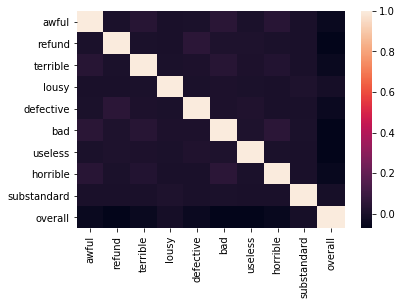

In [74]:
sns.heatmap(negative_reviews_subset.corr())

In [75]:
data = negative_reviews_subset[keywords]
target = negative_reviews_subset['overall']

print(data, target)

# # Our data is binary / boolean, so we're importing the Bernoulli classifier.
# from sklearn.naive_bayes import BernoulliNB

# # Instantiate our model and store it in a new variable.
# bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

        awful  refund  terrible  lousy  defective    bad  useless  horrible  \
0       False   False     False  False      False  False    False     False   
1       False   False     False  False      False  False    False     False   
2       False   False     False  False      False  False    False     False   
3       False   False     False  False      False  False    False     False   
4       False   False     False  False      False  False    False     False   
5       False   False     False  False      False  False    False     False   
6       False   False     False  False      False  False    False     False   
7       False   False     False  False      False  False    False     False   
8       False   False     False  False      False  False    False     False   
9       False   False     False  False      False  False    False     False   
10      False   False     False  False      False  False    False     False   
11      False   False     False  False      False  F

Okay... so 100% correct... That's crazy!!! 

In [76]:
confusion_matrix(target, y_pred)

array([[  2527,  64027],
       [  1822, 277979]])

I think now is a good time to do some cross validations!!! :-P

In [80]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(negative_reviews_subset):
    data = negative_reviews_subset.iloc[train_index][keywords]
    target = negative_reviews_subset.iloc[train_index]['overall']
    test_data = negative_reviews_subset.iloc[test_index][keywords]
    test_target = negative_reviews_subset.iloc[test_index]['overall']

    bnb.fit(data, target)
    
    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(test_data)
    # Display our results.
    print("Number of mislabeled points out of a total {} points : {}".format(
        test_target.shape[0],(test_target != y_pred).sum()))
    print(confusion_matrix(test_target, y_pred))


Number of mislabeled points out of a total 69271 points : 13150
[[  499 12778]
 [  372 55622]]
Number of mislabeled points out of a total 69271 points : 13231
[[  507 12898]
 [  333 55533]]
Number of mislabeled points out of a total 69271 points : 13076
[[  534 12732]
 [  344 55661]]
Number of mislabeled points out of a total 69271 points : 13242
[[  500 12857]
 [  385 55529]]
Number of mislabeled points out of a total 69271 points : 13152
[[  484 12765]
 [  387 55635]]


81% correct.... I wonder if adding both positive and negative words would help...

In [84]:
reviews_subset.great

0          True
1          True
2          True
3          True
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15         True
16         True
17        False
18        False
19        False
20        False
21        False
22         True
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
346325    False
346326    False
346327     True
346328    False
346329     True
346330    False
346331    False
346332    False
346333     True
346334    False
346335    False
346336    False
346337     True
346338    False
346339     True
346340    False
346341    False
346342    False
346343    False
346344    False
346345     True
346346    False
346347    False
346348    False
346349    False
346350    False
346351     True
346352     True
346353     True
346354    False
Name: great, Length: 346

In [86]:
pos_neg_reviews = health_reviews.copy()

In [87]:
pos_neg_reviews.reviewText = pos_neg_reviews.reviewText.str.lower()
pos_neg_reviews.reviewText = pos_neg_reviews['reviewText'].str.replace('[^\w\s]',' ')

keywords = ['awful','refund','terrible','lousy','defective','bad','useless','horrible','substandard', 'great','good','fantastic','useful','love','recommend','nice']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    pos_neg_reviews[str(key)] = pos_neg_reviews.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    
pos_neg_reviews.loc[pos_neg_reviews.overall < 4, 'overall'] = False
pos_neg_reviews.loc[pos_neg_reviews.overall >= 4, 'overall'] = True

pos_neg_reviews_subset = pos_neg_reviews[keywords + ['overall']]

pos_neg_reviews_subset.overall = pos_neg_reviews_subset.overall.astype('bool')

pos_neg_reviews_subset.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,awful,refund,terrible,lousy,defective,bad,useless,horrible,substandard,great,good,fantastic,useful,love,recommend,nice,overall
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [88]:
data = pos_neg_reviews[keywords]
target = negative_reviews_subset['overall']

print(data, target)

# # Our data is binary / boolean, so we're importing the Bernoulli classifier.
# from sklearn.naive_bayes import BernoulliNB

# # Instantiate our model and store it in a new variable.
# bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

        awful  refund  terrible  lousy  defective    bad  useless  horrible  \
0       False   False     False  False      False  False    False     False   
1       False   False     False  False      False  False    False     False   
2       False   False     False  False      False  False    False     False   
3       False   False     False  False      False  False    False     False   
4       False   False     False  False      False  False    False     False   
5       False   False     False  False      False  False    False     False   
6       False   False     False  False      False  False    False     False   
7       False   False     False  False      False  False    False     False   
8       False   False     False  False      False  False    False     False   
9       False   False     False  False      False  False    False     False   
10      False   False     False  False      False  False    False     False   
11      False   False     False  False      False  F

Number of mislabeled points out of a total 346355 points : 65651


In [89]:
confusion_matrix(target, y_pred)

array([[  2145,  64409],
       [  1242, 278559]])

81% correct